In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [163]:
comp = pd.read_csv('Complications_-_Hospital.csv')
death = pd.read_csv('Readmissions_and_Deaths.csv')

In [5]:
readm_only = death[death['Measure ID'].str.contains('READM')] #excluding mortality
readm_only.info() #dataframe of readmissions only

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38456 entries, 6 to 67297
Data columns (total 19 columns):
Provider ID             38456 non-null int64
Hospital Name           38456 non-null object
Address                 38456 non-null object
City                    38456 non-null object
State                   38456 non-null object
ZIP Code                38456 non-null int64
County Name             38336 non-null object
Phone Number            38456 non-null int64
Measure Name            38456 non-null object
Measure ID              38456 non-null object
Compared to National    38456 non-null object
Denominator             38456 non-null object
Score                   38456 non-null object
Lower Estimate          38456 non-null object
Higher Estimate         38456 non-null object
Footnote                14162 non-null object
Measure Start Date      38456 non-null object
Measure End Date        38456 non-null object
Location                0 non-null float64
dtypes: float64(1), int

In [6]:
abbot = readm_only[readm_only['Hospital Name'] == 'ABBOTT NORTHWESTERN HOSPITAL'] #just grabbing one example to graph

In [148]:
list_conditions = ['Heart Attack', 'Coronary Artery Bypass', 'COPD', 'Heart Failure', 'Hip/Knee Replacement',
                          'General', 'Pneumonia', 'Stroke']

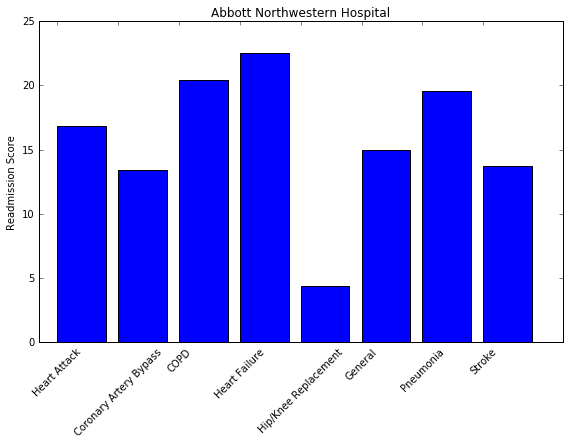

In [149]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
wid = .3
ind = ind = np.arange(len(abbot.Score))
plt.bar(ind, abbot.Score)

xTickMarks = [i for i in list_conditions]
ax.set_xticks(ind)
xtickNames = ax.set_xticklabels(xTickMarks, fontsize=8)
ax.set_xlim(-wid,len(ind)+wid)
plt.setp(xtickNames, rotation=45, fontsize=10)
plt.ylabel('Readmission Score')
plt.title('Abbott Northwestern Hospital')
fig.tight_layout()
fig.subplots_adjust(bottom=0.2)
plt.show()

In [28]:
readm_only.Score.notnull().count()

38456

In [104]:
readm_only.Score[:1] #Why is this an object and not a float - because of NaNs?

6    16.5
Name: Score, dtype: object

In [106]:
readm_only.Score.unique() #'Not Available' is screwing this up 

array(['16.5', '15.1', '21.1', '21.4', '5.1', '15.4', '18.7', '12.7',
       '16.7', 'Not Available', '18.0', '21.9', '5.7', '14.9', '16.4',
       '13.4', '16.1', '15.2', '19.8', '20.6', '5.0', '17.9', '12.0',
       '19.9', '16.6', '17.3', '11.3', '19.2', '23.1', '15.7', '16.0',
       '17.7', '15.0', '19.6', '15.3', '23.4', '19.4', '12.8', '15.8',
       '21.5', '14.7', '17.1', '12.4', '23.0', '22.4', '4.1', '15.9',
       '18.3', '13.5', '21.3', '14.8', '18.1', '15.6', '19.5', '23.3',
       '4.7', '18.6', '13.8', '14.0', '17.2', '19.0', '4.9', '16.9',
       '13.0', '16.8', '12.6', '23.2', '5.9', '12.1', '21.6', '16.3',
       '23.7', '20.1', '21.7', '16.2', '22.8', '4.6', '12.5', '3.9',
       '20.3', '24.0', '13.7', '4.8', '12.3', '19.7', '21.0', '6.7',
       '13.1', '20.8', '22.2', '11.2', '14.2', '22.3', '17.5', '20.0',
       '22.5', '4.3', '20.4', '19.1', '14.6', '13.3', '17.8', '22.6',
       '14.1', '18.8', '20.7', '20.9', '20.2', '6.2', '22.9', '13.2',
       '5.5', '15.

In [107]:
readm_only[readm_only['Score'] == 0] #There are no 0s in this dataframe

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,...,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date,Location,h,Score_noNAN


In [109]:
z = readm_only['Score'].replace({'Not Available':'0'}) 
z.astype(float, inplace = True) #Now this is a float type

6        16.5
7        15.1
8        21.1
9        21.4
10        5.1
11       15.4
12       18.7
13       12.7
20       16.7
21        0.0
22       18.0
23       21.9
24        5.7
25       14.9
26       16.4
27       13.4
34       16.1
35       15.2
36       19.8
37       20.6
38        5.0
39       15.4
40       17.9
41       12.0
48        0.0
49        0.0
50       19.9
51       21.1
52        0.0
53       16.6
         ... 
67250     0.0
67251     0.0
67252     0.0
67253     0.0
67254     0.0
67255     0.0
67262     0.0
67263     0.0
67264     0.0
67265     0.0
67266     0.0
67267     0.0
67268     0.0
67269     0.0
67276     0.0
67277     0.0
67278     0.0
67279     0.0
67280     0.0
67281     0.0
67282     0.0
67283     0.0
67290     0.0
67291     0.0
67292     0.0
67293     0.0
67294     0.0
67295     0.0
67296     0.0
67297     0.0
Name: Score, dtype: float64

In [99]:
temp = readm_only['Score_noNAN'].astype(float)
readm_only['Score_noNAN'] = temp

/Users/sheena/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [110]:
readm_only.dtypes

Provider ID               int64
Hospital Name            object
Address                  object
City                     object
State                    object
ZIP Code                  int64
County Name              object
Phone Number              int64
Measure Name             object
Measure ID               object
Compared to National     object
Denominator              object
Score                    object
Lower Estimate           object
Higher Estimate          object
Footnote                 object
Measure Start Date       object
Measure End Date         object
Location                float64
h                        object
Score_noNAN             float64
dtype: object

In [111]:
r = pd.pivot_table(readm_only, index='Hospital Name', columns = 'Measure ID', values = 'Score_noNAN')
#r.index = r.index.droplevel()

In [122]:
r.head()

Measure ID,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK
Hospital Name,,,,,,,,
ABBEVILLE AREA MEDICAL CENTER,-1.0,-1.0,20.3,21.1,4.4,15.7,17.3,-1.0
ABBEVILLE GENERAL HOSPITAL,-1.0,-1.0,19.1,24.6,4.2,16.0,17.8,-1.0
ABBOTT NORTHWESTERN HOSPITAL,16.8,13.4,20.4,22.5,4.4,15.0,19.6,13.7
ABILENE REGIONAL MEDICAL CENTER,16.4,15.0,18.3,22.4,4.0,14.5,15.5,13.5
ABINGTON MEMORIAL HOSPITAL,18.1,13.9,22.8,21.6,5.4,16.2,16.2,12.3


In [124]:
for x in r.columns:
    print x

READM_30_AMI
READM_30_CABG
READM_30_COPD
READM_30_HF
READM_30_HIP_KNEE
READM_30_HOSP_WIDE
READM_30_PN
READM_30_STK


In [142]:
lis = []
for x in r.columns:
    lis.append(r[x].mean(axis=0))

In [143]:
lis

[6.971633752893516,
 2.242389529596563,
 14.877977688905421,
 16.362410430100898,
 2.172767572958003,
 14.15359705687829,
 14.368494181960976,
 6.314772419601533]

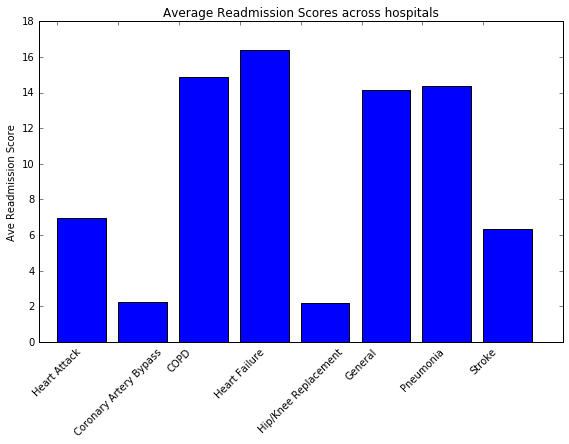

In [152]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

leng = np.arange(len(lis))
plt.bar(leng, lis)

xTickMarks = [i for i in list_conditions]
ax.set_xticks(leng)
xtickNames = ax.set_xticklabels(xTickMarks, fontsize=8)
ax.set_xlim(-wid,len(ind)+wid)
plt.setp(xtickNames, rotation=45, fontsize=10)
plt.ylabel('Ave Readmission Score')
plt.title('Average Readmission Scores across hospitals')
fig.tight_layout()
fig.subplots_adjust(bottom=0.2)
plt.show()
plt.show()

In [164]:
comp.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date,Location
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Rate of complications for hip/knee replacement...,COMP_HIP_KNEE,No Different than the National Rate,331,3.8,2.6,5.5,NaN,04/01/2012,03/31/2015,NaN
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Serious blood clots after surgery,PSI_12_POSTOP_PULMEMB_DVT,No Different than the National Rate,4549,3.32,1.25,5.38,NaN,07/01/2013,06/30/2015,NaN
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Blood stream infection after surgery,PSI_13_POST_SEPSIS,No Different than the National Rate,578,5.72,0.00,11.48,NaN,07/01/2013,06/30/2015,NaN
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,A wound that splits open after surgery on the...,PSI_14_POSTOP_DEHIS,No Different than the National Rate,445,2.72,0.65,4.79,NaN,07/01/2013,06/30/2015,NaN
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Accidental cuts and tears from medical treatment,PSI_15_ACC_LAC,No Different than the National Rate,16429,1.35,0.76,1.95,NaN,07/01/2013,06/30/2015,NaN


In [165]:
comp.info() #Same problem here with the scores being objects and not floats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52877 entries, 0 to 52876
Data columns (total 19 columns):
Provider ID             52877 non-null int64
Hospital Name           52877 non-null object
Address                 52877 non-null object
City                    52877 non-null object
State                   52877 non-null object
ZIP Code                52877 non-null int64
County Name             52712 non-null object
Phone Number            52877 non-null int64
Measure Name            52877 non-null object
Measure ID              52877 non-null object
Compared to National    52877 non-null object
Denominator             52877 non-null object
Score                   52877 non-null object
Lower Estimate          52877 non-null object
Higher Estimate         52877 non-null object
Footnote                21804 non-null object
Measure Start Date      52877 non-null object
Measure End Date        52877 non-null object
Location                0 non-null float64
dtypes: float64(1), int

In [178]:
len(comp[comp.Score == 0]) # No 0 values here, so I'm safe to assign Not Availables to 0 

0

In [179]:
comp['Score'].replace('Not Available', 0, inplace=True)

In [180]:
comp['Score'] = comp['Score'].astype(float)
comp.dtypes

Provider ID               int64
Hospital Name            object
Address                  object
City                     object
State                    object
ZIP Code                  int64
County Name              object
Phone Number              int64
Measure Name             object
Measure ID               object
Compared to National     object
Denominator              object
Score                   float64
Lower Estimate           object
Higher Estimate          object
Footnote                 object
Measure Start Date       object
Measure End Date         object
Location                float64
dtype: object

In [189]:
na = len(comp[comp['Lower Estimate'] == 'Not Available'])
zero = len(comp[comp['Lower Estimate'] == 0]) 
print "'Not Available' appears %s times and 0 appears %s times for Lower Estimates." % (na, zero)
#Not Availables exists here too but there are no 0s

'Not Available' appears 21801 times and 0 appears 0 times for Lower Estimates.


In [190]:
na_h = len(comp[comp['Higher Estimate'] == 'Not Available'])
zero_h = len(comp[comp['Higher Estimate'] == 0]) 
print "'Not Available' appears %s times and 0 appears %s times for Higher Estimates." % (na_h, zero_h)
#Not Availables exists here too but there are no 0s

'Not Available' appears 21801 times and 0 appears 0 times for Higher Estimates.


In [193]:
comp['Lower Estimate'] = comp['Lower Estimate'].replace('Not Available', 0)

In [195]:
comp['Lower Estimate'] = comp['Lower Estimate'].astype(float)
comp['Lower Estimate'].dtype

dtype('float64')

In [197]:
comp['Higher Estimate'] = comp['Higher Estimate'].replace('Not Available', 0)
comp['Higher Estimate'] = comp['Higher Estimate'].astype(float)
comp['Higher Estimate'].dtype

dtype('float64')

In [200]:
comp_score = pd.pivot_table(comp, index='Hospital Name', columns = 'Measure ID', values = 'Score')
comp_score.head()

Measure ID,COMP_HIP_KNEE,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC,PSI_3_ULCER,PSI_4_SURG_COMP,PSI_6_IAT_PTX,PSI_7_CVCBI,PSI_8_POST_HIP,PSI_90_SAFETY
Hospital Name,,,,,,,,,,,
ABBEVILLE AREA MEDICAL CENTER,3.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ABBEVILLE GENERAL HOSPITAL,3.0,6.51,0.00,2.28,1.69,0.35,0.00,0.39,0.16,0.06,1.02
ABBOTT NORTHWESTERN HOSPITAL,2.5,5.23,11.26,1.78,1.96,0.10,124.52,0.32,0.11,0.06,0.97
ABILENE REGIONAL MEDICAL CENTER,3.1,3.43,6.36,2.21,1.17,0.16,138.47,0.40,0.12,0.06,0.67
ABINGTON MEMORIAL HOSPITAL,4.3,8.47,10.30,3.59,1.29,1.09,153.64,0.32,0.13,0.06,1.10


In [202]:
comp_low = pd.pivot_table(comp, index='Hospital Name', columns = 'Measure ID', values = 'Lower Estimate')
comp_low.head()

Measure ID,COMP_HIP_KNEE,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC,PSI_3_ULCER,PSI_4_SURG_COMP,PSI_6_IAT_PTX,PSI_7_CVCBI,PSI_8_POST_HIP,PSI_90_SAFETY
Hospital Name,,,,,,,,,,,
ABBEVILLE AREA MEDICAL CENTER,1.7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
ABBEVILLE GENERAL HOSPITAL,1.7,1.67,0.00,0.00,0.37,0.00,0.00,0.07,0.0,0.06,0.57
ABBOTT NORTHWESTERN HOSPITAL,1.7,3.47,6.15,0.00,1.42,0.00,92.72,0.09,0.0,0.06,0.78
ABILENE REGIONAL MEDICAL CENTER,2.0,0.17,0.00,0.00,0.27,0.00,92.17,0.12,0.0,0.06,0.36
ABINGTON MEMORIAL HOSPITAL,3.3,6.51,4.19,1.53,0.75,0.51,117.66,0.09,0.0,0.06,0.91


In [225]:
col_list_low = list(comp_low.columns.values)

In [226]:
low_cols = []
for i in col_list_low:
    low_cols.append(i + '_low')
print low_cols

['COMP_HIP_KNEE_low_low', 'PSI_12_POSTOP_PULMEMB_DVT_low_low', 'PSI_13_POST_SEPSIS_low_low', 'PSI_14_POSTOP_DEHIS_low_low', 'PSI_15_ACC_LAC_low_low', 'PSI_3_ULCER_low_low', 'PSI_4_SURG_COMP_low_low', 'PSI_6_IAT_PTX_low_low', 'PSI_7_CVCBI_low_low', 'PSI_8_POST_HIP_low_low', 'PSI_90_SAFETY_low_low']


In [217]:
comp_low.columns = low_cols

In [218]:
comp_low.head()

,COMP_HIP_KNEE_low,PSI_12_POSTOP_PULMEMB_DVT_low,PSI_13_POST_SEPSIS_low,PSI_14_POSTOP_DEHIS_low,PSI_15_ACC_LAC_low,PSI_3_ULCER_low,PSI_4_SURG_COMP_low,PSI_6_IAT_PTX_low,PSI_7_CVCBI_low,PSI_8_POST_HIP_low,PSI_90_SAFETY_low
Hospital Name,,,,,,,,,,,
ABBEVILLE AREA MEDICAL CENTER,1.7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
ABBEVILLE GENERAL HOSPITAL,1.7,1.67,0.00,0.00,0.37,0.00,0.00,0.07,0.0,0.06,0.57
ABBOTT NORTHWESTERN HOSPITAL,1.7,3.47,6.15,0.00,1.42,0.00,92.72,0.09,0.0,0.06,0.78
ABILENE REGIONAL MEDICAL CENTER,2.0,0.17,0.00,0.00,0.27,0.00,92.17,0.12,0.0,0.06,0.36
ABINGTON MEMORIAL HOSPITAL,3.3,6.51,4.19,1.53,0.75,0.51,117.66,0.09,0.0,0.06,0.91


In [223]:
comp_high = pd.pivot_table(comp, index='Hospital Name', columns = 'Measure ID', values = 'Higher Estimate')

In [227]:
col_list_high = list(comp_high.columns.values)

In [228]:
high_cols = []
for i in col_list_high:
    high_cols.append(i + '_high')
print high_cols

['COMP_HIP_KNEE_high', 'PSI_12_POSTOP_PULMEMB_DVT_high', 'PSI_13_POST_SEPSIS_high', 'PSI_14_POSTOP_DEHIS_high', 'PSI_15_ACC_LAC_high', 'PSI_3_ULCER_high', 'PSI_4_SURG_COMP_high', 'PSI_6_IAT_PTX_high', 'PSI_7_CVCBI_high', 'PSI_8_POST_HIP_high', 'PSI_90_SAFETY_high']


In [231]:
comp_high.columns = high_cols

In [232]:
comp_high.head()

,COMP_HIP_KNEE_high,PSI_12_POSTOP_PULMEMB_DVT_high,PSI_13_POST_SEPSIS_high,PSI_14_POSTOP_DEHIS_high,PSI_15_ACC_LAC_high,PSI_3_ULCER_high,PSI_4_SURG_COMP_high,PSI_6_IAT_PTX_high,PSI_7_CVCBI_high,PSI_8_POST_HIP_high,PSI_90_SAFETY_high
Hospital Name,,,,,,,,,,,
ABBEVILLE AREA MEDICAL CENTER,5.2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ABBEVILLE GENERAL HOSPITAL,5.0,11.34,0.00,4.60,3.02,1.65,0.00,0.71,0.47,0.06,1.47
ABBOTT NORTHWESTERN HOSPITAL,3.7,6.99,16.38,3.83,2.49,0.80,156.32,0.54,0.32,0.06,1.16
ABILENE REGIONAL MEDICAL CENTER,4.7,6.68,12.96,4.49,2.08,1.04,184.78,0.68,0.40,0.06,0.98
ABINGTON MEMORIAL HOSPITAL,5.7,10.43,16.42,5.65,1.83,1.67,189.61,0.54,0.35,0.06,1.30


In [235]:
comp_result = pd.concat([comp_score, comp_low, comp_high], axis=1)

In [236]:
comp_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4608 entries, ABBEVILLE AREA MEDICAL CENTER to ZUNI COMPREHENSIVE COMMUNITY HEALTH CENTER
Data columns (total 33 columns):
COMP_HIP_KNEE                     4608 non-null float64
PSI_12_POSTOP_PULMEMB_DVT         4608 non-null float64
PSI_13_POST_SEPSIS                4608 non-null float64
PSI_14_POSTOP_DEHIS               4608 non-null float64
PSI_15_ACC_LAC                    4608 non-null float64
PSI_3_ULCER                       4608 non-null float64
PSI_4_SURG_COMP                   4608 non-null float64
PSI_6_IAT_PTX                     4608 non-null float64
PSI_7_CVCBI                       4608 non-null float64
PSI_8_POST_HIP                    4608 non-null float64
PSI_90_SAFETY                     4608 non-null float64
COMP_HIP_KNEE_low                 4608 non-null float64
PSI_12_POSTOP_PULMEMB_DVT_low     4608 non-null float64
PSI_13_POST_SEPSIS_low            4608 non-null float64
PSI_14_POSTOP_DEHIS_low           4608 non-null 